# Clasificador paisajes
Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en el Classroom como `seg_train.zip` y `seg_test.zip`. Se pide:
1. Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones).
2. Investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.
3. Normaliza
4. Diseña la arquitectura de la red. Recuerda que es un algoritmo de clasificación. Ojo con las dimensiones de la entrada
5. Reserva un 20% de los datos del entrenamiento para validar.
6. Representa el objeto history
7. Evalua el modelo con los datos de test
8. Representa algunos de los paisajes donde el modelo comete errores
9. Crea una matriz de confusión con los errores del modelo

**NOTA apartado 1**: para el apartado 1 tendras que recorre las carpetas/imagenes con `os.listdir()`, e ir cargando todas las imagenes como arrays de numpy

**NOTA apartado 4**: empieza con un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer. on softmax como ultima capa

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from skimage.io import imread
import keras
import cv2

In [1]:
class_names = ['mountain','street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i , class_name in enumerate(class_names)}
class_names_label

{'mountain': 0,
 'street': 1,
 'glacier': 2,
 'buildings': 3,
 'sea': 4,
 'forest': 5}

In [3]:
IMAGE_SIZE = (32,32)
TRAIN_PATH = os.getcwd() + '\\data\\seg_train'
TEST_PATH = os.getcwd() + '\\data\\seg_test'

In [6]:
def read_data(path:str, im_size:tuple):
    '''
    Lectura de datos de imágenes etiquetadas en diferentes carpetas

    Args:
        path: ruta donde se encuentran los datos
        im_size: tamaño deseado de las imágenes

    Returns:
        X: array con píxeles
        y: label de la imagen
    '''
    X = []
    y = []

    # Recorremos las carpetas del path
    for folder in os.listdir(path):
        label = class_names_label[folder]
        folder_path = os.path.join(path, folder)
        
        # Recorremos las imagenes de cada carpeta
        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            image = imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            smallimage = cv2.resize(image, im_size)

            # Añadimos píxeles y etiquetas a nuestro dataset.
            X.append(smallimage)
            y.append(label)
    
    return np.array(X), np.array(y)

In [8]:
X_train, y_train = read_data(TRAIN_PATH, IMAGE_SIZE)
X_test, y_test= read_data(TEST_PATH, IMAGE_SIZE)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14034, 32, 32, 3)
(3000, 32, 32, 3)
(14034,)
(3000,)


In [12]:
pd.Series(y_train).value_counts(normalize=True)

0    0.178994
2    0.171298
1    0.169731
4    0.162035
5    0.161821
3    0.156121
dtype: float64

In [13]:
pd.Series(y_test).value_counts(normalize=True)

2    0.184333
0    0.175000
4    0.170000
1    0.167000
5    0.158000
3    0.145667
dtype: float64

In [17]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=10)
X_test, y_test = shuffle(X_test, y_test,random_state=10)

In [18]:
y_train[:20]

array([3, 2, 1, 1, 2, 5, 0, 4, 3, 1, 1, 4, 5, 1, 4, 0, 4, 4, 3, 2])

mountain


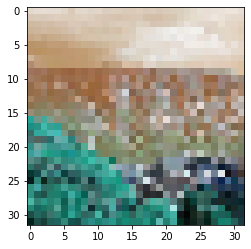

In [34]:
index = np.random.randint(X_train.shape[0])

print(class_names[y_train[index]])
plt.imshow(X_train[index])

In [36]:
print(X_train.min())
print(X_train.max())

0
255


In [37]:
X_train.shape

(14034, 32, 32, 3)

In [45]:
X_train = X_train/255
X_test = X_test/255

In [47]:
print(X_train.min())
print(X_train.max())

0.0
1.0


In [49]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(6, activation="softmax")
])

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 32)                3

In [56]:
64 + (3*3)*3*64

1792

In [58]:
32 + (3*3)*32*64

18464

In [59]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [61]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 20,
    validation_split = 0.2
)

Epoch 1/20
88/88 [==============================] - 16s 177ms/step - loss: 1.2689 - accuracy: 0.4942 - val_loss: 1.0720 - val_accuracy: 0.5750
Epoch 2/20
88/88 [==============================] - 19s 213ms/step - loss: 1.0064 - accuracy: 0.6134 - val_loss: 0.9675 - val_accuracy: 0.6373
Epoch 3/20
88/88 [==============================] - 18s 202ms/step - loss: 0.9051 - accuracy: 0.6580 - val_loss: 0.8951 - val_accuracy: 0.6630
Epoch 4/20
88/88 [==============================] - 15s 167ms/step - loss: 0.8533 - accuracy: 0.6831 - val_loss: 0.8546 - val_accuracy: 0.6968
Epoch 5/20
88/88 [==============================] - 15s 169ms/step - loss: 0.7992 - accuracy: 0.7047 - val_loss: 0.8152 - val_accuracy: 0.7032
Epoch 6/20
88/88 [==============================] - 14s 165ms/step - loss: 0.7645 - accuracy: 0.7208 - val_loss: 0.8128 - val_accuracy: 0.7029
Epoch 7/20
88/88 [==============================] - 15s 169ms/step - loss: 0.7244 - accuracy: 0.7388 - val_loss: 0.7909 - val_accuracy: 0.7121

In [62]:
df_hist = pd.DataFrame(history.history)
df_hist

,loss,accuracy,val_loss,val_accuracy
0,1.268921,0.494166,1.072020,0.574991
1,1.006440,0.613432,0.967467,0.637335
2,0.905076,0.657967,0.895061,0.662985
3,0.853301,0.683085,0.854589,0.696829
4,0.799152,0.704730,0.815207,0.703242
5,0.764483,0.720762,0.812792,0.702886
6,0.724447,0.738755,0.790943,0.712148
7,0.702378,0.744277,0.738433,0.736730
8,0.680657,0.748909,0.731598,0.740292
9,0.655846,0.760933,0.718523,0.740292


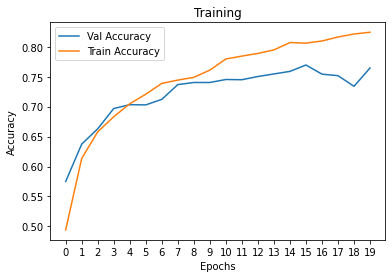

In [68]:
plt.plot(df_hist['val_accuracy'], label="Val Accuracy")
plt.plot(df_hist['accuracy'], label="Train Accuracy")
plt.title("Training")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.xticks(np.arange(0,20))
plt.legend()

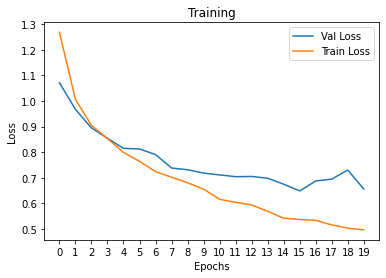

In [69]:
plt.plot(df_hist['val_loss'], label="Val Loss")
plt.plot(df_hist['loss'], label="Train Loss")
plt.title("Training")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.xticks(np.arange(0,20))
plt.legend()

In [70]:
results = model.evaluate(X_test, y_test)

94/94 [==============================] - 1s 11ms/step - loss: 0.6511 - accuracy: 0.7670


In [72]:
y_pred = model.predict(X_test)
y_pred.round(2)

array([[0.98, 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.05, 0.23, 0.01, 0.67, 0.  , 0.04],
       [0.15, 0.  , 0.83, 0.  , 0.02, 0.  ],
       ...,
       [0.24, 0.09, 0.61, 0.03, 0.02, 0.01],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.4 , 0.02, 0.51, 0.06, 0.01, 0.  ]], dtype=float32)

In [73]:
pred_labels = np.argmax(y_pred, axis=1)
pred_labels

array([0, 3, 2, ..., 2, 5, 2], dtype=int64)

In [74]:
class_names

['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']

In [75]:
label_pred = [class_names[pred] for pred in pred_labels]
label_pred

['mountain',
 'buildings',
 'glacier',
 'sea',
 'forest',
 'mountain',
 'glacier',
 'glacier',
 'sea',
 'street',
 'buildings',
 'sea',
 'buildings',
 'buildings',
 'street',
 'mountain',
 'glacier',
 'mountain',
 'glacier',
 'buildings',
 'buildings',
 'glacier',
 'buildings',
 'glacier',
 'buildings',
 'glacier',
 'buildings',
 'buildings',
 'forest',
 'forest',
 'mountain',
 'buildings',
 'glacier',
 'glacier',
 'sea',
 'buildings',
 'street',
 'mountain',
 'glacier',
 'forest',
 'forest',
 'buildings',
 'glacier',
 'street',
 'glacier',
 'mountain',
 'buildings',
 'mountain',
 'glacier',
 'glacier',
 'forest',
 'street',
 'mountain',
 'sea',
 'glacier',
 'glacier',
 'forest',
 'glacier',
 'glacier',
 'forest',
 'mountain',
 'glacier',
 'glacier',
 'forest',
 'buildings',
 'buildings',
 'sea',
 'glacier',
 'mountain',
 'sea',
 'forest',
 'mountain',
 'mountain',
 'buildings',
 'glacier',
 'street',
 'street',
 'buildings',
 'sea',
 'forest',
 'glacier',
 'sea',
 'mountain',
 'street

In [79]:
import seaborn as sns

In [77]:
from sklearn.metrics import confusion_matrix

c_mat = confusion_matrix(y_test, pred_labels, normalize='true')

In [81]:
class_names

['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']

<AxesSubplot:>

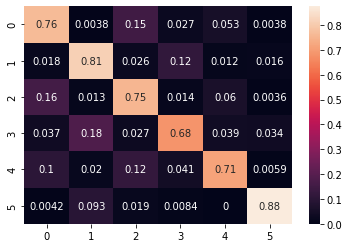

In [80]:
sns.heatmap(c_mat, annot=True)